In [118]:
import sys
sys.path.append("/Users/ueki/.pyenv/versions/3.7.3/lib/python3.7/site-packages")

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

## create data

In [152]:
# prepare dataset
np.random.seed(777)

In [153]:
# dataset 4
N = 200
D=4
x = 3 * (np.random.rand(N, 4) - 0.5)
y = (2 * x[:, 0] - 1 * x[:,1] + 0.5 + 0.5 * np.random.randn(N)) > 0
y = 2 * y -1

In [154]:
N_iter = 100

# batch steepest gradient method

In [155]:
#epoch
num_iter = N_iter
#重みの初期値
lam=0.01
w_init= np.ones(D)
#learning rate-> Lipsittsのuppper boundをlrにする
alpha_base = 0.01
#learning history
grad_loss_history = []
grad_ww_history = []
# lr descent しなくていいから、いらないかも
lip = 0.25*np.max(x**2)
alpha_base *=1/ lip

In [156]:
lip

0.5615094088579156

In [157]:
alpha_base

0.0178091405811695

In [158]:
ww = w_init
for t in range(1,num_iter+1):
    xy = x*(-y).reshape(-1,1)
    posterior = 1/(1+np.exp(np.dot(xy,ww)))
    grad = 1/N*np.sum(np.dot((1-posterior),xy)) + 2*lam*ww
    loss = 1/N*np.sum(np.log(1+np.exp(np.dot(xy,ww))))+lam*(np.dot(ww.T,ww)+1)
    grad_ww_history.append(ww)
    grad_loss_history.append(loss)
    #update
    ww = ww-alpha_base*grad

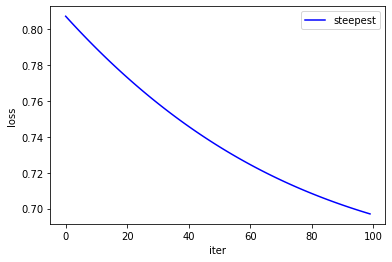

In [159]:
plt.plot(grad_loss_history, 'b', markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

In [212]:
np.sum(np.dot(xy,xy.T),axis=1).shape

(200,)

In [218]:
p = posterior.reshape(-1,1)

In [223]:
np.sum(np.dot(p,p.T),axis=1).shape

(200,)

In [197]:
posterior.shape
p = posterior.reshape(-1,1)
p.shape

(200, 1)

In [199]:
np.dot(p,p.T).shape

(200, 200)

# newton based method(hessの計算がやばそう

In [234]:
#epoch
num_iter = N_iter
#learning history
newton_loss_history = []
newton_ww_history = []

In [235]:
ww = w_init
for t in range(1,num_iter+1):
    xy = x*(-y).reshape(-1,1)
    posterior = 1/(1+np.exp(np.dot(xy,ww)))
    post = posterior.reshape(-1,1)
    grad = 1/N*np.sum(np.dot((1-post).T,xy)) + 2*lam*ww
    
    hess = 1/N*np.sum(np.sum(np.dot(post,post.T),axis=1)* np.sum(np.dot(xy,xy.T),axis=1))+2*lam 
    loss = 1/N*np.sum(np.log(1+np.exp(np.dot(xy,ww))))+lam*(np.dot(ww.T,ww)+1)
    newton_ww_history.append(ww)
    newton_loss_history.append(loss)
    
    #update
    ww = ww -grad/hess

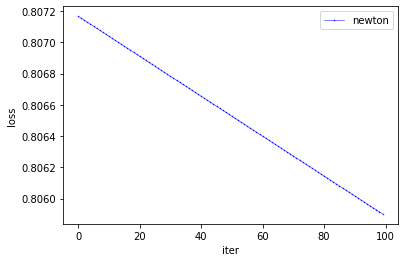

In [236]:
plt.plot( newton_loss_history, 'bo-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

# compare performance

In [237]:
optimal_w = min(min(grad_loss_history),min(newton_loss_history))

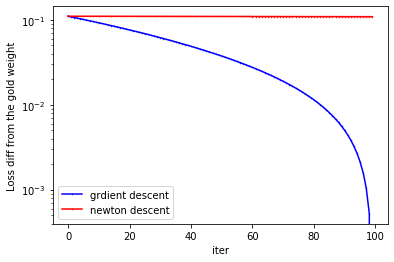

In [238]:
plt.plot(np.abs(grad_loss_history-optimal_w,),"bo-",markersize=0.5,label="grdient descent")
plt.plot(np.abs(newton_loss_history-optimal_w),"ro-",markersize=0.5,label="newton descent")
plt.legend()
plt.yscale("log")
plt.xlabel("iter")
plt.ylabel("Loss diff from the gold weight")
plt.show()

# adaptation to Multi class classification

## create Data (Toy dataset V)

In [629]:
# dataset 5
N = 200
D=4
n_class=3
x =3* (np.random.rand(N,3) - 0.5)
W_init = np.random.rand(D-1,D-1)
y = np.argmax(np.dot(np.hstack([x[:,:2], np.ones((N, 1))]), W.T)
                        + 0.5 * np.random.randn(N, n_class), axis=1)

In [630]:
from keras.utils import np_utils

In [631]:
y_one_hot =np_utils.to_categorical(y)

In [632]:
lam = 0.01
N_iter=50

## Steep Gradient

In [638]:
#epoch
num_iter = N_iter
#learning history
steep_loss_history = []
steep_ww_history = []

In [639]:
ww = W_init
for t in range(1,num_iter+1):
    posterior = 1/(1+np.exp(-np.dot(y_one_hot.T,(np.dot(x,ww))))) # \in (N,))
    grad = 1/N*np.sum(np.dot((1-posterior),np.dot(x.T,y_one_hot ))) + 2*lam*ww # \in D
    loss =  1/N*np.sum(-np.dot(y_one_hot,ww) + np.max(np.dot(ww,x.T),axis=1))
    steep_ww_history.append(ww)
    steep_loss_history.append(loss)
    #update
    ww = ww-alpha_base*grad

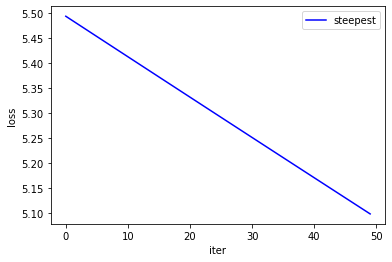

In [640]:

plt.plot(steep_loss_history, 'b', markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

## Newton

In [649]:
#epoch
num_iter = N_iter
#learning history
newton_loss_history = []
newton_ww_history = []

In [650]:
ww = W_init
for t in range(1,num_iter+1):
    posterior = 1/(1+np.exp(-np.dot(y_one_hot.T,(np.dot(x,ww))))) # \in (N,))
    grad = 1/N*np.sum(np.dot((1-posterior),np.dot(x.T,y_one_hot ))) + 2*lam*ww # \in D
    hess = 1/N*np.sum(np.dot(np.dot(posterior.T,(1-posterior)), np.dot(x.T,x)),axis=1)
    loss =  1/N*np.sum(-np.dot(y_one_hot,ww) + np.max(np.dot(ww,x.T),axis=1))
    newton_ww_history.append(ww)
    newton_loss_history.append(loss)
    #update
    ww = ww-grad/hess

/Users/ueki/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [651]:
hess = 1/N*np.sum(np.dot(np.dot(posterior.T,(1-posterior)), np.dot(x.T,x)),axis=1)

In [652]:
hess.shape

(3,)

In [653]:
grad.shape

(3, 3)

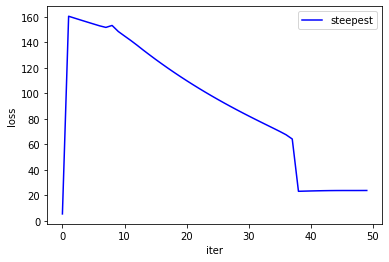

In [655]:
plt.plot(newton_loss_history, 'b', markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

In [656]:
optimal_w = min(min(steep_loss_history),min(newton_loss_history))

Text(0, 0.5, 'Loss diff from the gold weight')

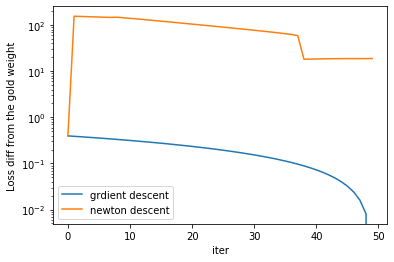

In [657]:
plt.plot(np.abs(steep_loss_history-optimal_w),label="grdient descent")
plt.plot(np.abs(newton_loss_history-optimal_w),label="newton descent")
plt.legend()
plt.yscale("log")
plt.xlabel("iter")
plt.ylabel("Loss diff from the gold weight")